In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import random

def generate_random_graph(num_nodes, num_edges):
    G = nx.gnm_random_graph(num_nodes, num_edges)
    for (u, v, w) in G.edges(data=True):
        w['weight'] = random.randint(1, 10) # Assign random weights between 1 and 10
    return G
import matplotlib.pyplot as plt

def visualize_graph(G):
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True)
    labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
    plt.show()

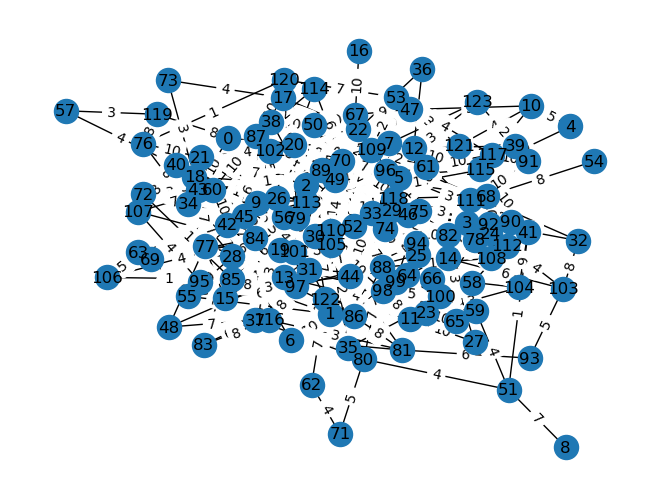

In [8]:
num_nodes = 124
num_edges = 300
G = generate_random_graph(num_nodes, num_edges)
visualize_graph(G)

In [9]:
import numpy as np

class QLearningAgent:
    def __init__(self, num_nodes, learning_rate, discount_factor, exploration_rate):
        self.num_nodes = num_nodes
        self.lr = learning_rate
        self.gamma = discount_factor
        self.epsilon = exploration_rate
        self.q_table = np.zeros((num_nodes, num_nodes))

    def choose_action(self, state):
        if np.random.random() < self.epsilon:
            return np.random.randint(self.num_nodes)
        else:
            return np.argmax(self.q_table[state])

    def update_q_table(self, state, action, reward, next_state):
        self.q_table[state, action] += self.lr * (reward + self.gamma * np.max(self.q_table[next_state]) - self.q_table[state, action])

def train_agent(G, agent, start_node, end_node, num_episodes, max_steps_per_episode):
    for _ in range(num_episodes):
        state = start_node
        steps = 0
        while state != end_node and steps < max_steps_per_episode:
            action = agent.choose_action(state)
            next_state = action
            edge_data = G.get_edge_data(state, next_state)
            reward = -edge_data['weight'] if edge_data is not None else -100
            agent.update_q_table(state, action, reward, next_state)
            state = next_state
            steps += 1

def get_shortest_path(agent, start_node, end_node):
    path = [start_node]
    state = start_node
    visited = set()
    while state != end_node:
        visited.add(state)
        action = np.argmax(agent.q_table[state])
        if action in visited:  # Prevent loops
            break
        state = action
        path.append(state)
    return path

def visualize_shortest_path(G, path):
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True)
    labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
    path_edges = list(zip(path[:-1], path[1:]))
    nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='r', width=2)
    plt.show()


Shortest path: [8, 51, 41, 29, 33, 92, 101, 89, 60, 40, 57]


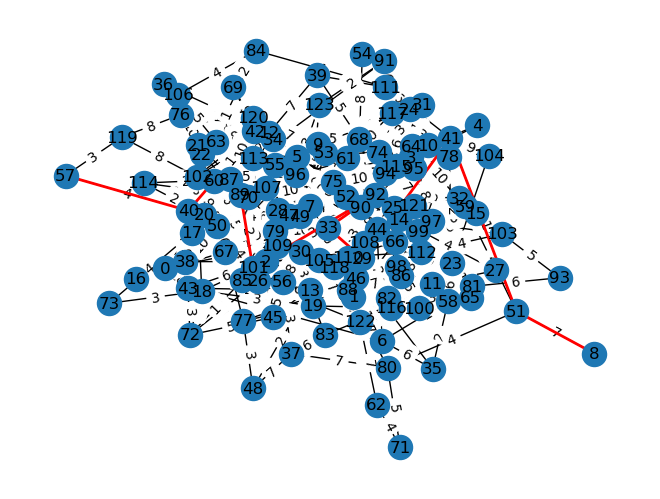

In [11]:
# Parameters
num_episodes = 5000
max_steps_per_episode = 100
learning_rate = 0.1
discount_factor = 0.99
exploration_rate = 0.1
start_node = 8
end_node = 57

# Train Q-learning agent
agent = QLearningAgent(num_nodes, learning_rate, discount_factor, exploration_rate)
train_agent(G, agent, start_node, end_node, num_episodes, max_steps_per_episode)

# Get and visualize the shortest path
path = get_shortest_path(agent, start_node, end_node)
print("Shortest path:", path)
visualize_shortest_path(G, path)

## Demostration

Dijkstra's shortest path: [103, 81, 86, 114, 105, 67, 43]
Q-Learning path weight: 22
Dijkstra's path weight: 22
The Q-Learning agent found the shortest path.


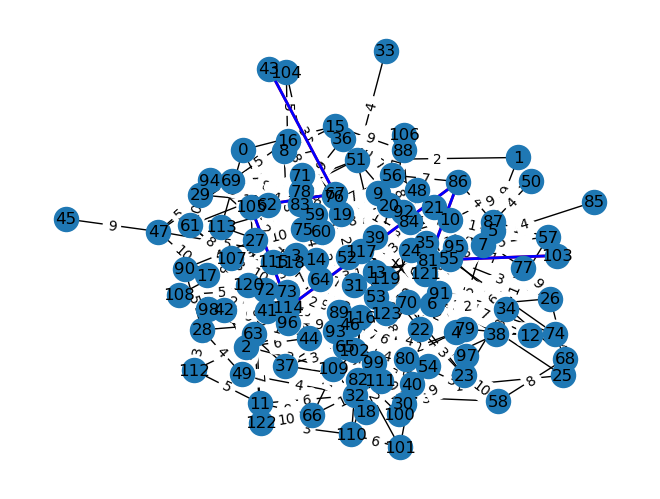

In [37]:
def dijkstra_shortest_path(G, start_node, end_node):
    return nx.dijkstra_path(G, start_node, end_node, weight='weight')

dijkstra_path = dijkstra_shortest_path(G, start_node, end_node)
print("Dijkstra's shortest path:", dijkstra_path)

def get_path_weight(G, path):
    total_weight = 0
    for i in range(len(path) - 1):
        edge_weight = G[path[i]][path[i + 1]]['weight']
        total_weight += edge_weight
    return total_weight

q_learning_weight = get_path_weight(G, path)
dijkstra_weight = get_path_weight(G, dijkstra_path)
print("Q-Learning path weight:", q_learning_weight)
print("Dijkstra's path weight:", dijkstra_weight)

if q_learning_weight == dijkstra_weight:
    print("The Q-Learning agent found the shortest path.")
else:
    print("The Q-Learning agent did not find the shortest path.")
    
def visualize_multiple_paths(G, paths, colors):
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True)
    labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
    
    for path, color in zip(paths, colors):
        path_edges = list(zip(path[:-1], path[1:]))
        nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color=color, width=2)
    
    plt.show()

paths = [path, dijkstra_path]
colors = ['r', 'b']
visualize_multiple_paths(G, paths, colors)
